In [1]:
# simple returns
# EP - BP / BP - multiple assets over the same timeframe
# EP / BP - 1

# EP / BG - single asset

# deviation
# daily_returns.std() * 250**0.5

In [2]:
import yfinance as yf
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel(
    "/Users/mg/personal/learning/9781789618976_Code/Code Files/81 Running a Regression in Python/Python 3/Housing.xlsx"
)
data

data[['House Price', 'House Size (sq.ft.)']]

,House Price,House Size (sq.ft.)
0,1116000,1940
1,860000,1300
2,818400,1420
3,1000000,1680
4,640000,1270
5,1010000,1850
6,600000,1000
7,700000,1100
8,1100000,1600
9,570000,1000


In [3]:
X = data['House Size (sq.ft.)']
Y = data['House Price']
X, Y

(0     1940
 1     1300
 2     1420
 3     1680
 4     1270
 5     1850
 6     1000
 7     1100
 8     1600
 9     1000
 10    2150
 11    1900
 12    2200
 13    1100
 14     860
 15    1325
 16    1350
 17    1600
 18     950
 19    1250
 Name: House Size (sq.ft.), dtype: int64,
 0     1116000
 1      860000
 2      818400
 3     1000000
 4      640000
 5     1010000
 6      600000
 7      700000
 8     1100000
 9      570000
 10     860000
 11    1085000
 12    1250000
 13     850000
 14     640000
 15     900000
 16     730000
 17     750000
 18     650000
 19     680000
 Name: House Price, dtype: int64)

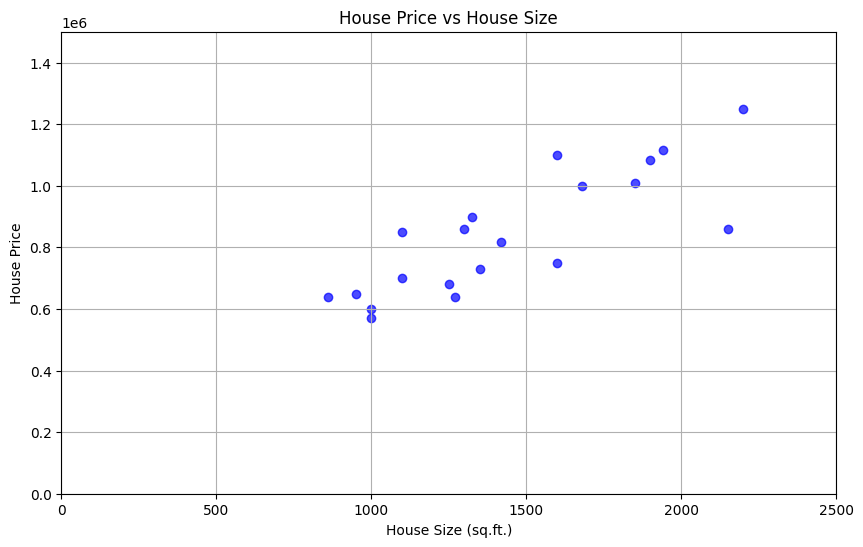

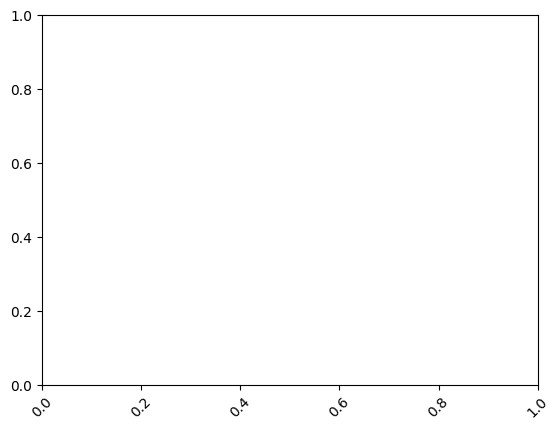

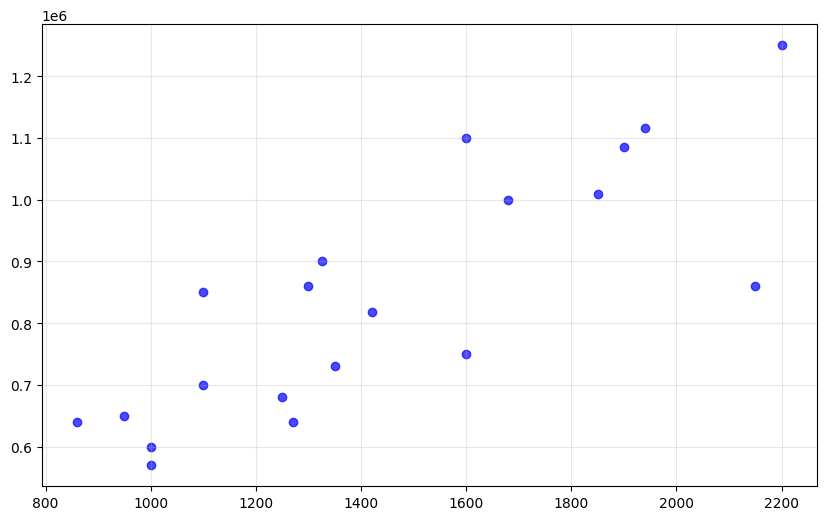

In [ ]:
plt.figure(figsize=(10, 6))  # Set figure size
plt.scatter(X, Y, alpha=0.7, color='blue')  # Create scatter plot with transparency
plt.grid(True)
plt.title('House Price vs House Size')           # Add title
plt.xlabel('House Size (sq.ft.)')               # Add X-axis label
plt.ylabel('House Price')      
plt.axis([0, 2500, 0, 1500000])                 # Add Y-axis label
plt.show()